In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sn
warnings.filterwarnings('ignore')
import plotly.express as pty
from scipy import stats
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#lets inspect the dataset by checking the info, shape and describe
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
#chek the number of null vlues in each column
sorted((dict(data.isnull().sum())).items(),  key = lambda x: x[1], reverse = True)
round(data.isnull().sum()/len(data.index)*100, 2).sort_values(ascending = False)

PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
FireplaceQu    47.26
               ...  
ExterQual       0.00
Exterior2nd     0.00
Exterior1st     0.00
RoofMatl        0.00
SalePrice       0.00
Length: 81, dtype: float64

In [6]:
#dropping Id column
data = data.drop(['Id'], axis = 1)
#removing the columns with null values % of null values > 80%  ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
null_colls = data.columns[round(data.isnull().sum()/len(data.index)*100, 2) > 80]
data.drop(null_colls, axis = 'columns', inplace = True)
#data.drop('Id', axis = 'columns', inplace = True)

#segregating the columns on basis of dtypes
obj_columns = data.columns[data.dtypes == 'object'].tolist()
num_cols = data.select_dtypes(include=['int', 'float']).columns.tolist()
print(num_cols) 
print(len(obj_columns))

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
39


In [7]:
obj_null_colls = data[obj_columns].columns[round(data[obj_columns].isnull().sum()/len(data[obj_columns].index)*100, 2) > 0]
obj_null_colls
num_null_colls = data[num_cols].columns[round(data[num_cols].isnull().sum()/len(data[num_cols].index)*100, 2) > 0]

In [8]:
for col in obj_null_colls:
    print(data[col].value_counts(dropna =False))
    print('\n')

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64


TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64


TA     1311
Gd       65
Fa       45
NaN      37
Po        2
Name: BsmtCond, dtype: int64


No     953
Av     221
Gd     134
Mn     114
NaN     38
Name: BsmtExposure, dtype: int64


Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NaN     37
Name: BsmtFinType1, dtype: int64


Unf    1256
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64


SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64


NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64


Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


Unf    605
RFn    422
Fin    352
NaN   

If we seee from the above information, all the info about guarage is having 81 missing values and there is no no_gurage option in it, so we can treat that the NaN values ad No_gurage. So, we can replace it with NA as Not Avaiable

For the other columns we can replace them with frequent values since the no of null values are neglegable

In [9]:
#replacing the NAN values in  'GarageType' GarageFinish', 'GarageQual', 'GarageCond' with NA trating it as no guarage
data[['GarageFinish', 'GarageQual','GarageType', 'GarageCond']]= data[['GarageFinish', 'GarageQual','GarageType', 'GarageCond']].fillna('NA', axis = 1)
#replacing the NAN values in other columns with medain
cat_var = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
           'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType',]
for col in cat_var:
        mode = data[col].mode()
        data[col] = data[col].fillna(mode[0])


In [10]:
for col in obj_null_colls:
    print(data[col].value_counts(dropna =False))
    print('\n')

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


TA    686
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64


TA    1348
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64


No    991
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64


Unf    467
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64


Unf    1294
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64


SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


Gd    1070
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64


Attchd     870
Detchd     387
BuiltIn     88
NA          81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


Unf    605
RFn    422
Fin    352
NA      81
Name: GarageFinish, dtype: int64


TA    1311
NA      81
Fa      48
Gd      14
Ex       3
Po       3
Nam

In [11]:
#before removing the null values
for col in num_null_colls:
    print(data[col].value_counts(dropna =False))
    print('\n')
for col in num_null_colls:
    data[num_null_colls] = data[num_null_colls].fillna(data[col].mean())
#before removing the null values
for col in num_null_colls:
    print(data[col].value_counts(dropna =False))
    print('\n')

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
137.0      1
38.0       1
33.0       1
150.0      1
46.0       1
Name: LotFrontage, Length: 111, dtype: int64


0.0      861
NaN        8
72.0       8
108.0      8
180.0      8
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 328, dtype: int64


NaN       81
2005.0    65
2006.0    59
2004.0    53
2003.0    50
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 98, dtype: int64


70.049958     259
60.000000     143
70.000000      70
80.000000      69
50.000000      57
             ... 
137.000000      1
38.000000       1
33.000000       1
150.000000      1
46.000000       1
Name: LotFrontage, Length: 111, dtype: int64


0.000000      861
70.049958       8
72.000000       8
108.000000      8
180.000000      8
             ... 
562.000000      1
89.000000       1
921.000000      1
762.000000      1
119.000

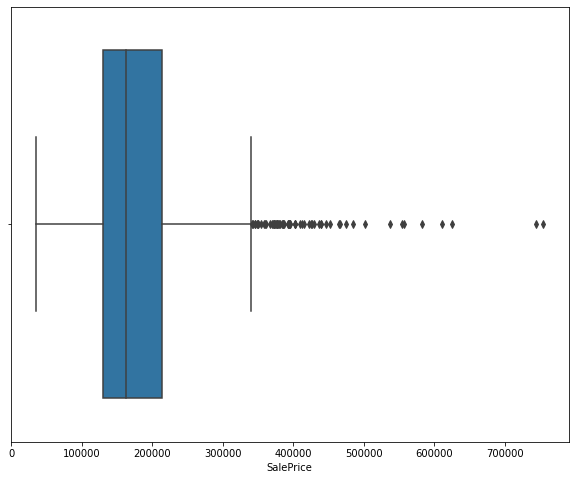

In [12]:
#Univariant analysis of key numeric variables
plt.figure(figsize=(10,8))
sn.boxplot(data['SalePrice'], orient = 'v')
plt.show()

From the above boxplot we can see that the medain 75% of price lies between 150000 to 250000
From the above boxplot we can see that the medain 50% of price lies between  to 125000 to 150000
there are outliers in this SalePrice column which are above 500000

In [13]:
#dealing with outlers in the price column using zscore
z = np.abs(stats.zscore(data[num_cols]))
s_cols = data[num_cols][z<3].all(axis=1)
data = data.loc[s_cols.index]

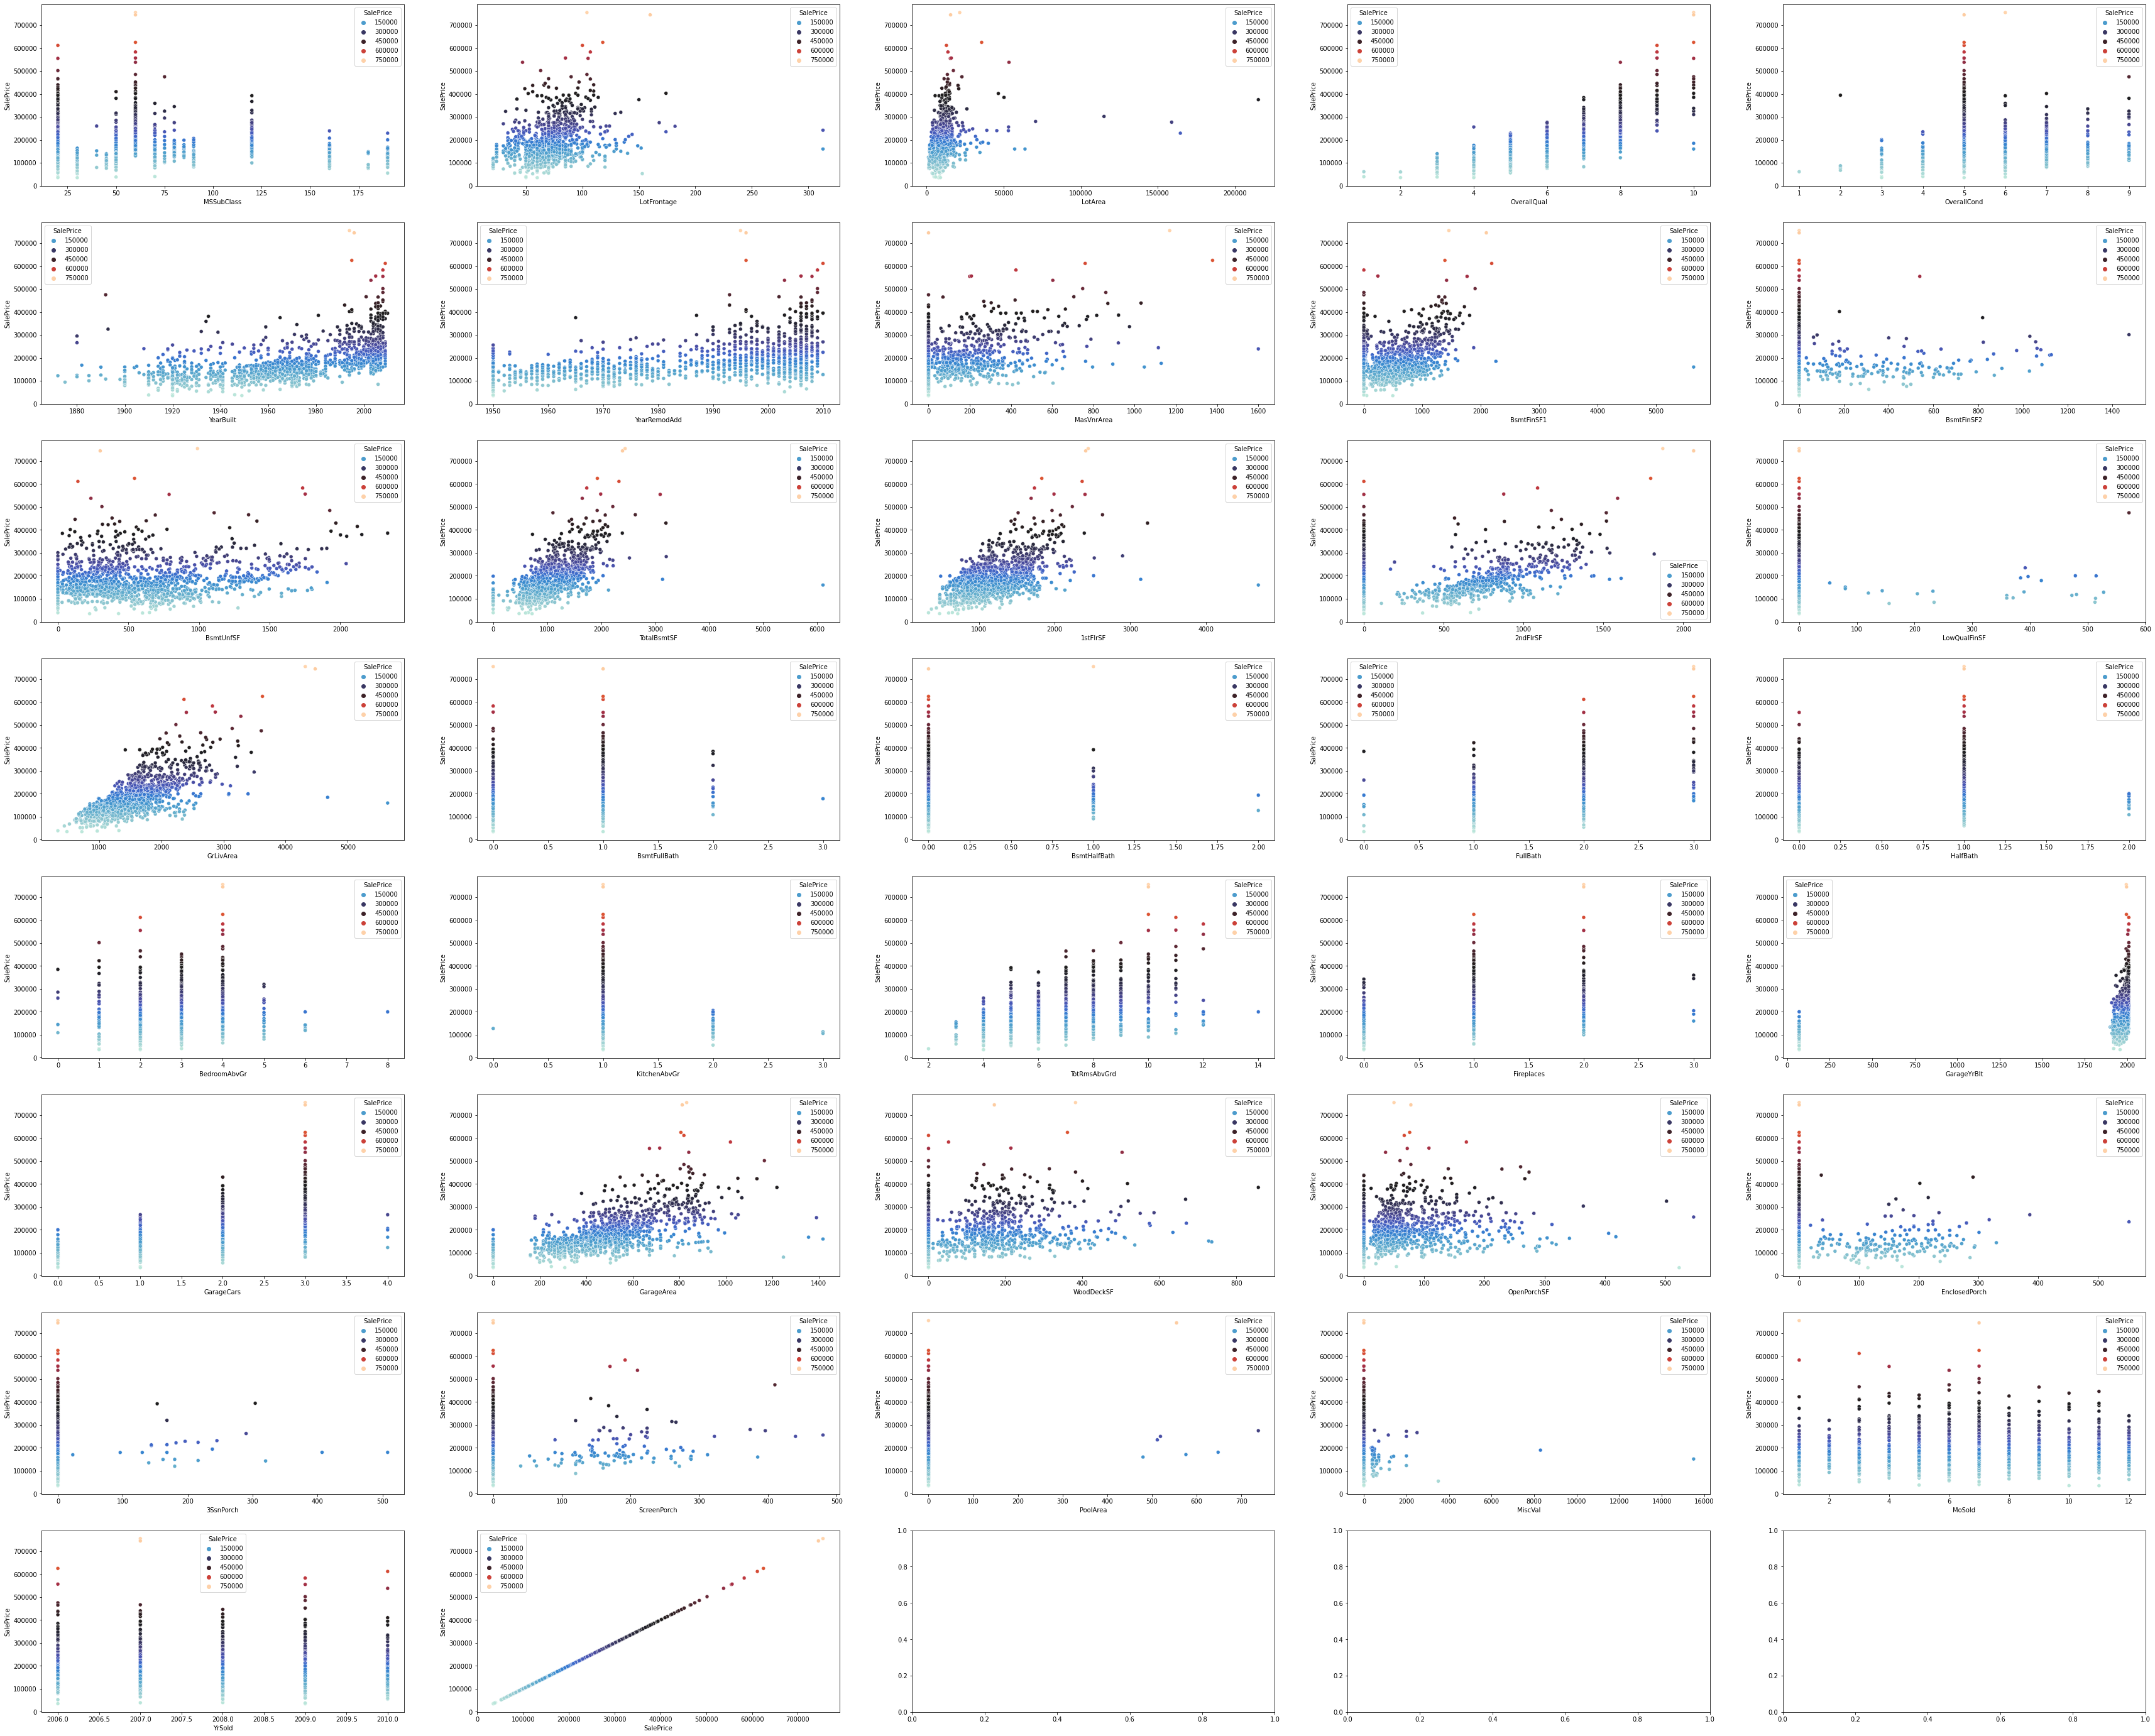

In [14]:
#byvariate analysis to see how the key numerical values effecting the sale price
fig, axis = plt.subplots(8,5,figsize = (60,50))
for col, axis in zip(num_cols, axis.flatten()):
    sn.scatterplot(x=data[col], y=data['SalePrice'], hue =data['SalePrice'], ax = axis, palette = 'icefire')
# i=1
# for col in key_num_var:
#     ax = fig.add_subplot(3,3,i)
#     try:
#         ax.scatter(y = data[col], x= data['SalePrice'], s = 200, color = 'orange', )
#     except Exception as e:
#         print(col, e)
#     i+=1

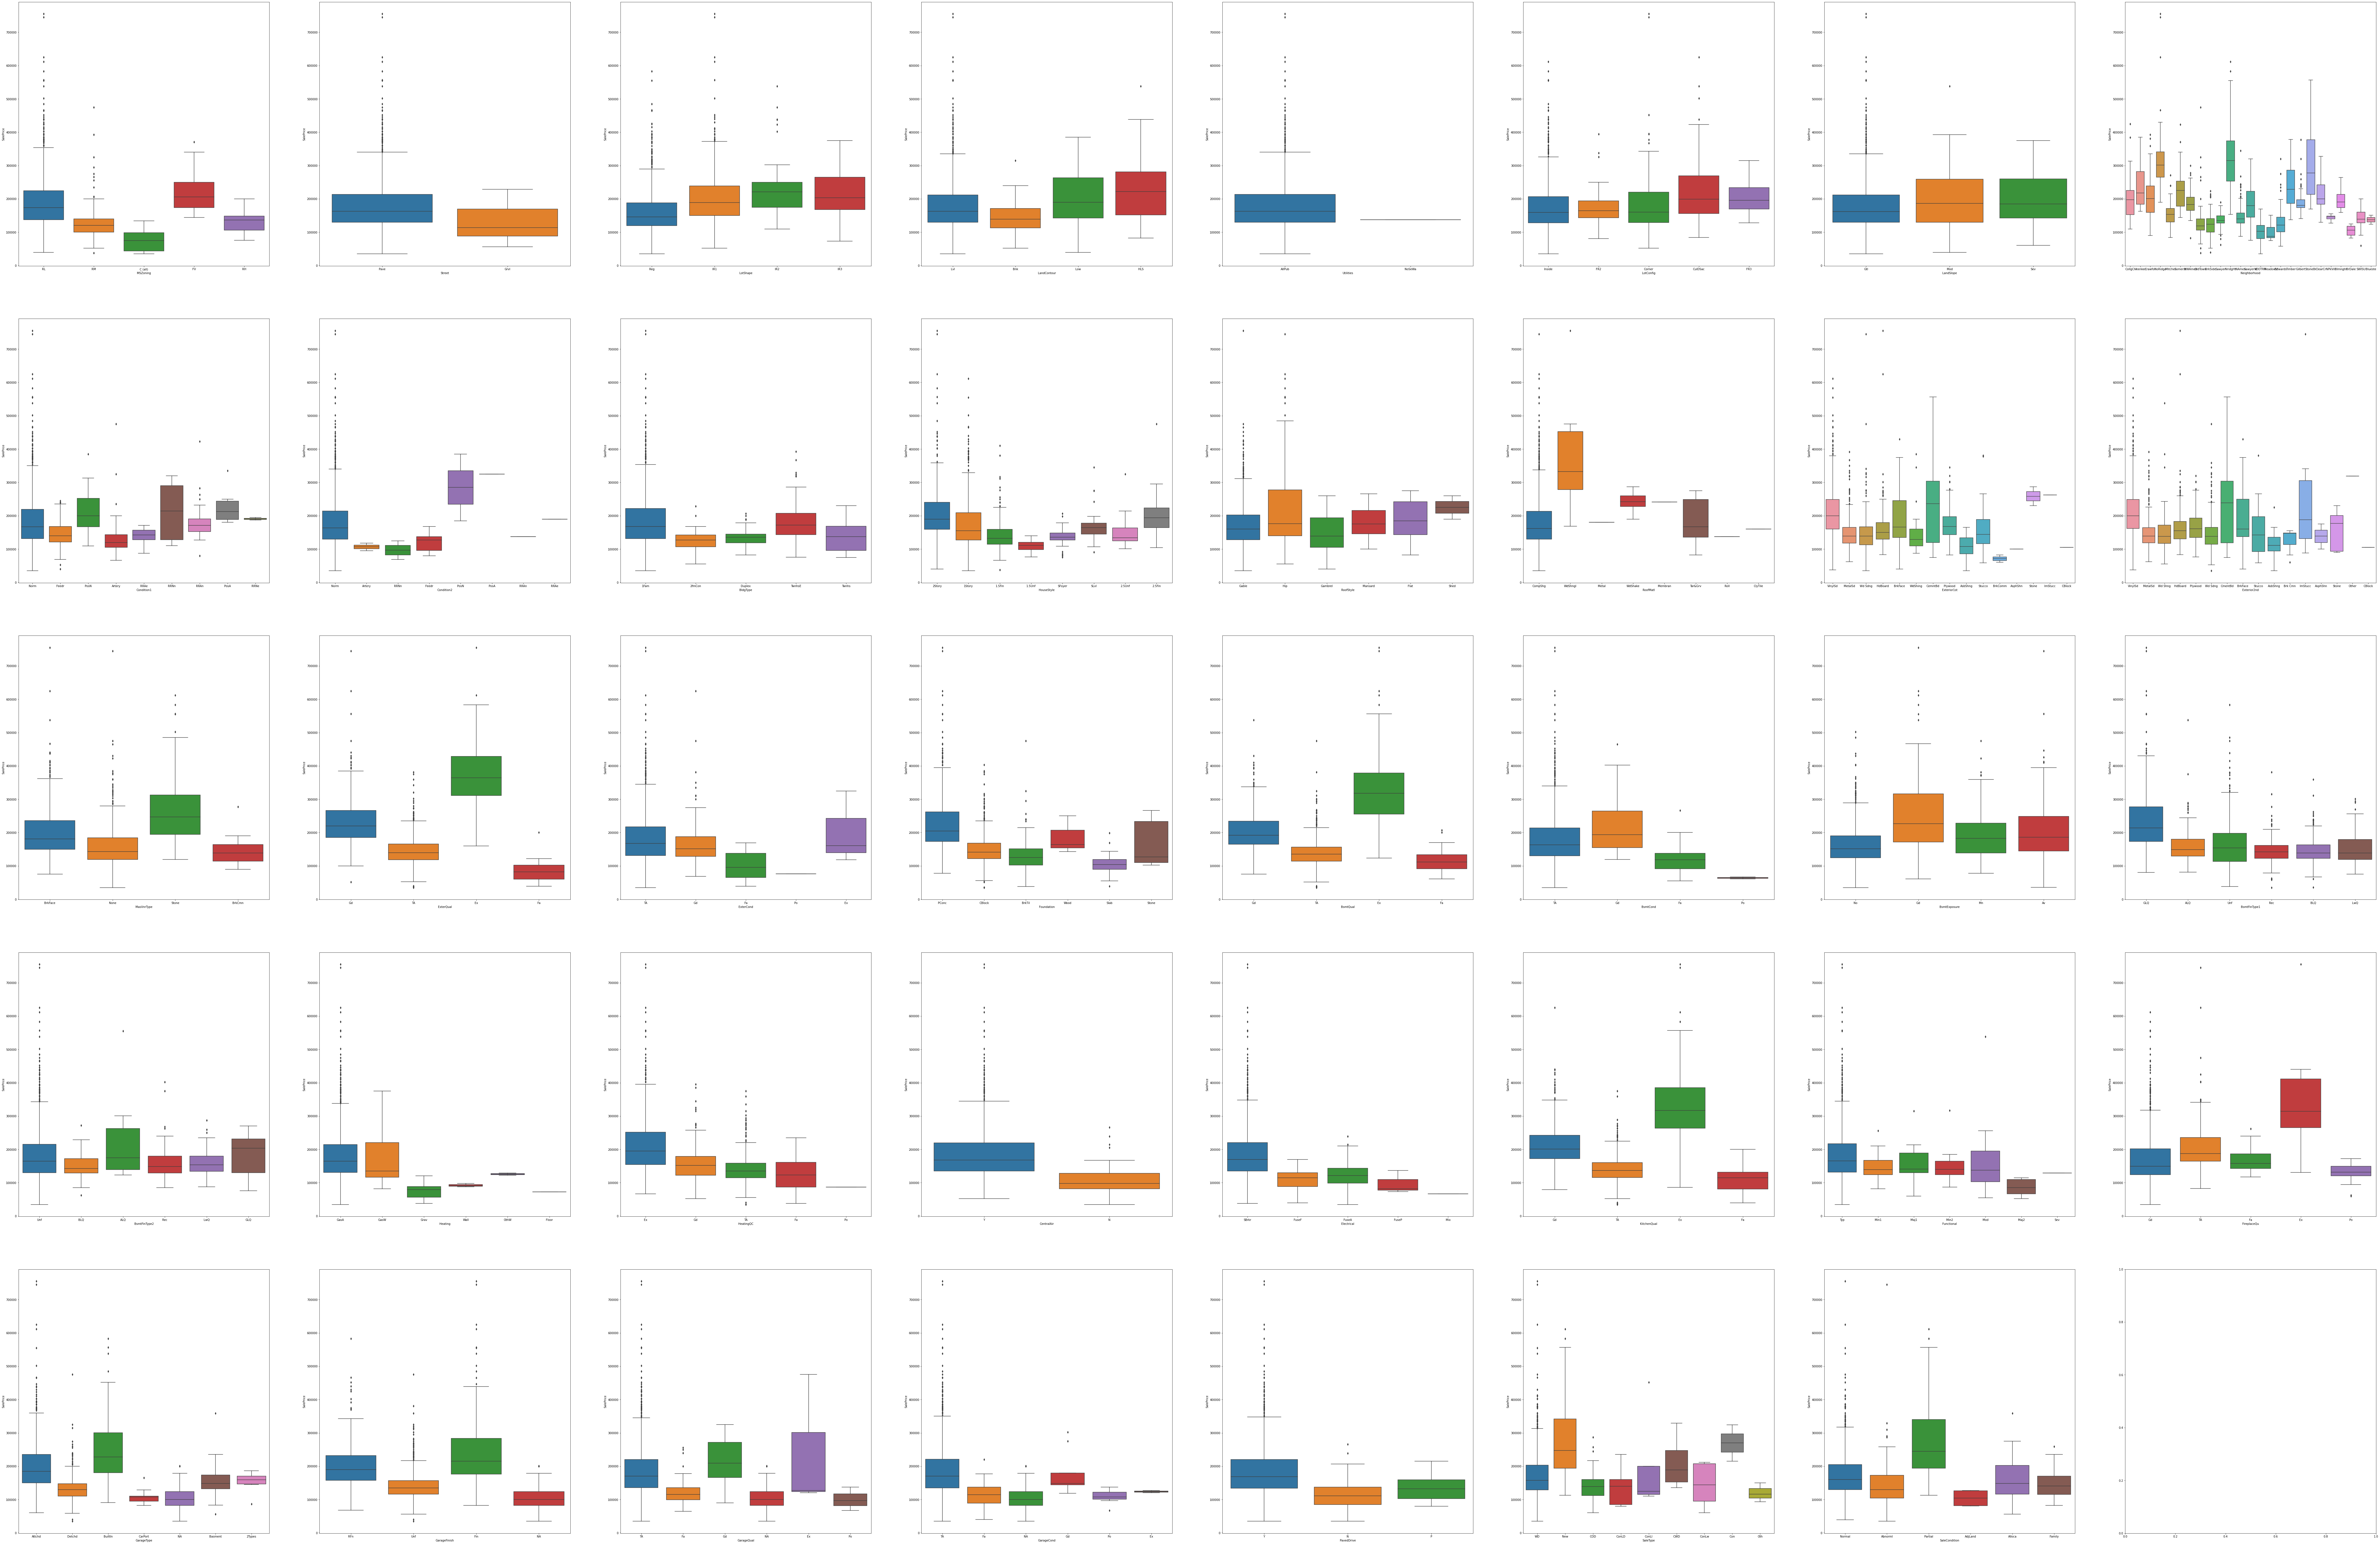

In [15]:
#byvariate analysis to see how the key numerical values effecting the sale price
fig,axs = plt.subplots(5,8, figsize = (150,100))
for col, ax in zip(obj_columns, axs.flatten()):
    sn.boxplot(x=data[col], y=data['SalePrice'], ax=ax)

In [16]:
#droping  lotArea, lotFrontage, 3snPorch, ScreenPorch, PoolArear, MixcVal since they are no linear reation between them and SaleProce
data.drop(['LowQualFinSF','LotArea', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis = 1)

,MSSubClass,MSZoning,LotFrontage,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,Y,0,61,0,2,2008,WD,Normal,208500
1,20,RL,80.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,TA,Y,298,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,Y,0,42,0,9,2008,WD,Normal,223500
3,70,RL,60.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,TA,Y,0,35,272,2,2006,WD,Abnorml,140000
4,60,RL,84.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,TA,Y,192,84,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,TA,Y,0,40,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,TA,Y,349,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,TA,Y,0,60,0,5,2010,WD,Normal,266500
1458,20,RL,68.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,TA,Y,366,0,112,4,2010,WD,Normal,142125


<AxesSubplot:>

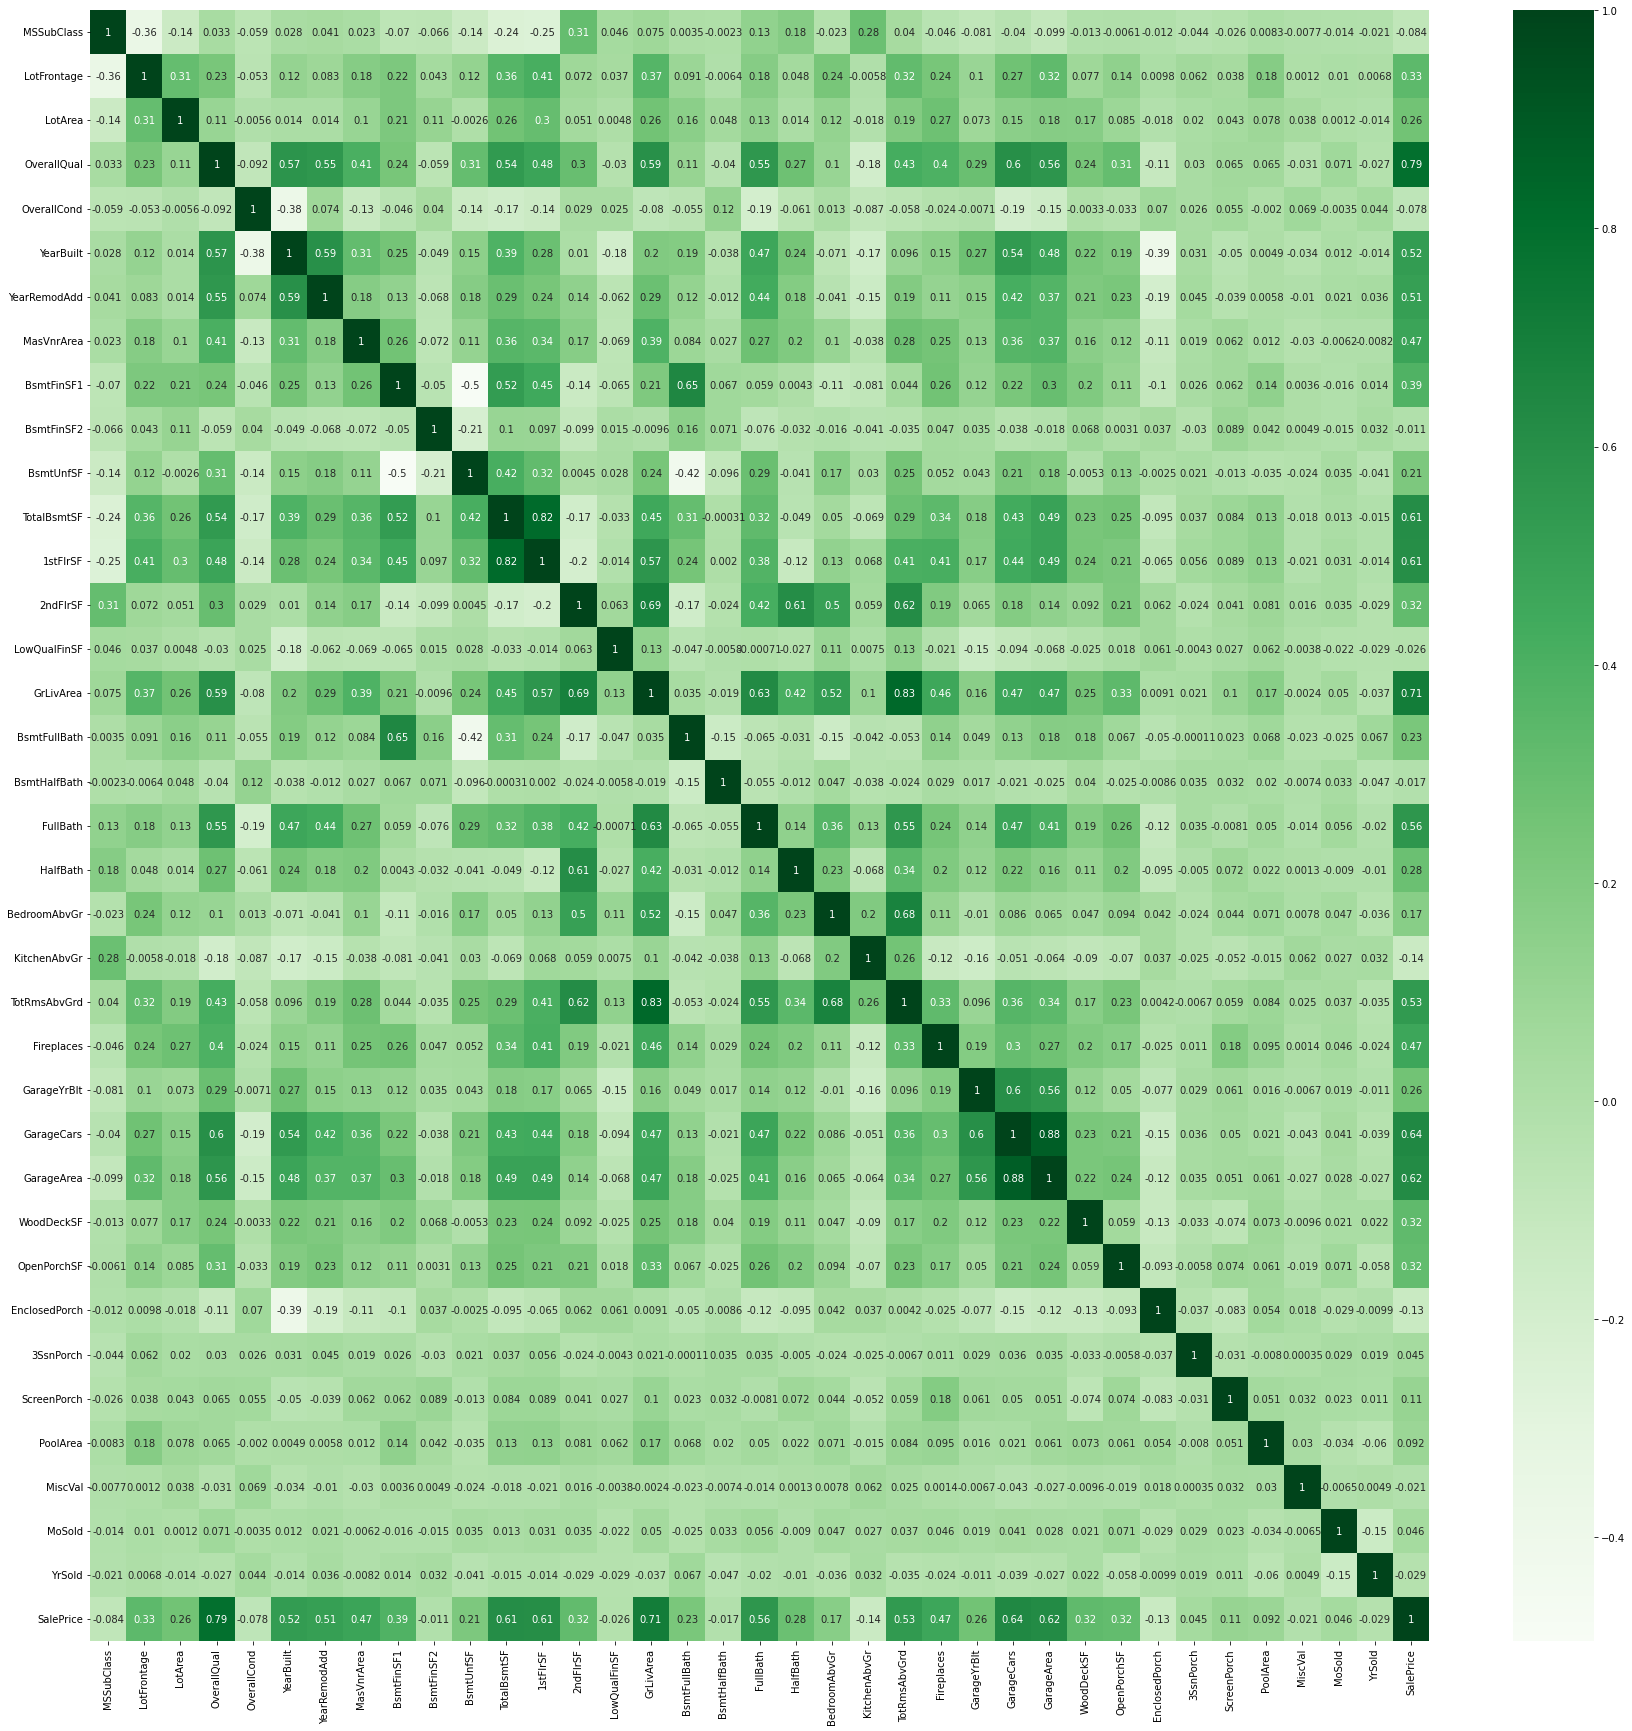

In [17]:
#checking the corealtion using correlation matrix
corr_mat = data[num_cols].corr()
plt.figure(figsize = (30,30))
sn.heatmap(corr_mat, annot = True, cmap = 'Greens')

From the above correlation matrix we can see the correlation between different varaible, So we need to preform feature elimation or feature selection using regularization Lasso or Ridge regression

In [18]:
#Label encoding for the ordinal variables 'GarageFinish','GarageQual','GarageCond', 'PavedDrive', 'FireplaceQu', 'KitchenQual','HeatingQC', 'BsmtExposure', 'BsmtCond', 'BsmtQual','ExterCond', 'ExterQual','LandSlope','LotShape'
from sklearn.preprocessing import LabelEncoder
ordinal_cols = ['GarageFinish','GarageQual','GarageCond', 'PavedDrive', 'FireplaceQu', 'KitchenQual','HeatingQC', 'BsmtExposure', 'BsmtCond', 'BsmtQual','ExterCond', 'ExterQual','LandSlope','LotShape']
le = LabelEncoder()
for col in ordinal_cols:
    data[col] = le.fit_transform(data[col])
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,3,Lvl,AllPub,Inside,0,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,3,Lvl,AllPub,FR2,0,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,0,Lvl,AllPub,Inside,0,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,0,Lvl,AllPub,Corner,0,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,0,Lvl,AllPub,FR2,0,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [19]:
#OnehotEncoding for nominal catagorical variable
nominal_cols = list(filter(lambda col: col not in ordinal_cols, obj_columns))
print(nominal_cols)

data_dummy = pd.get_dummies(data, columns = nominal_cols, drop_first = True)
data = pd.concat([data, data_dummy], axis =1)
data = data.drop(nominal_cols, axis = 1)
data.head()

['MSZoning', 'Street', 'LandContour', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'SaleType', 'SaleCondition']


,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,3,0,7,5,2003,2003,196.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,3,0,6,8,1976,1976,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,0,0,7,5,2001,2002,162.0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,0,0,7,5,1915,1970,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,0,0,8,5,2000,2000,350.0,...,0,0,0,0,1,0,0,0,1,0


In [20]:
data.shape

(1460, 259)

We can see that after encoding the variables, the number of columns increased to 209, now we can perfrom minmax scaling on ordinal and numeric variables

Train Test split

In [21]:
y = data['SalePrice']
X = data.drop('SalePrice', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [22]:
#scaling the variables using min max scalaer
num_cols.remove('SalePrice')
for i in ordinal_cols:
    num_cols.append(i)
Scaler = MinMaxScaler()
X_train[num_cols] = Scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = Scaler.transform(X_test[num_cols])
y_train = pd.DataFrame(Scaler.fit_transform(y_train))
y_test = pd.DataFrame(Scaler.transform(y_test))

In [23]:
lr = LinearRegression()
lr_fit = lr.fit(X_train, y_train)
y_pred = lr_fit.predict(X_train)
from sklearn.metrics import r2_score

r2_score(y_true = y_train , y_pred = y_pred)

0.9393469281930168

In [24]:
y_pred_test = lr_fit.predict(X_test)
r2_score(y_true = y_test, y_pred = y_pred_test)

-2.7779738942212744e+16

from the above r2 score of train and test fit, we can see that due the number of features, the model become complex and ovefit occured. Inorder to reglarize the model we can use Lasso and Ridge Regression

### Model Evaluation

Ridge()
Fitting 4 folds for each of 18 candidates, totalling 72 fits
best alpha values : 10


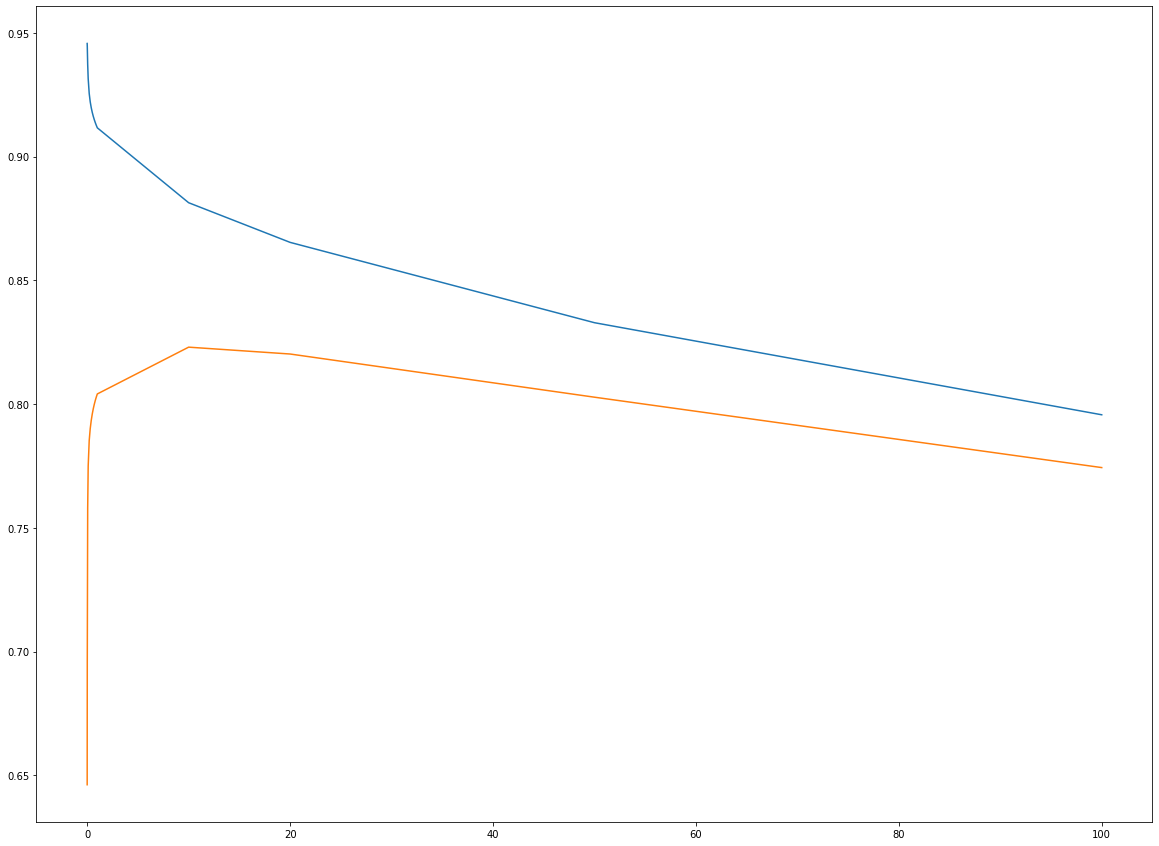

r2_score_train: 0.8769405376170998
r2_score_test: 0.8618099785711578
[('BsmtFullBath', [0.015404366429280536]), ('LandContour_Lvl', [0.016265187506211764]), ('OverallCond', [0.01643870781502852]), ('LandContour_HLS', [0.01647104991488973]), ('Fireplaces', [0.017497012197672926]), ('FullBath', [0.018622242217229086]), ('Exterior2nd_ImStucc', [0.020286326159058267]), ('Exterior1st_BrkFace', [0.020381603575608368]), ('TotRmsAbvGrd', [0.020714431352393155]), ('Neighborhood_StoneBr', [0.020931887478479193]), ('MasVnrArea', [0.02118036943095515]), ('Neighborhood_Crawfor', [0.022184832600200936]), ('GarageCars', [0.022426289932829867]), ('1stFlrSF', [0.030270451177258875]), ('Neighborhood_NridgHt', [0.03121691322473001]), ('2ndFlrSF', [0.03829526717266077]), ('GrLivArea', [0.04001252698034265]), ('RoofMatl_WdShngl', [0.040967038511007206]), ('OverallQual', [0.04659322004497259]), ('Neighborhood_NoRidge', [0.05171946748375713])]
Lasso()
Fitting 4 folds for each of 18 candidates, totalling 72 f

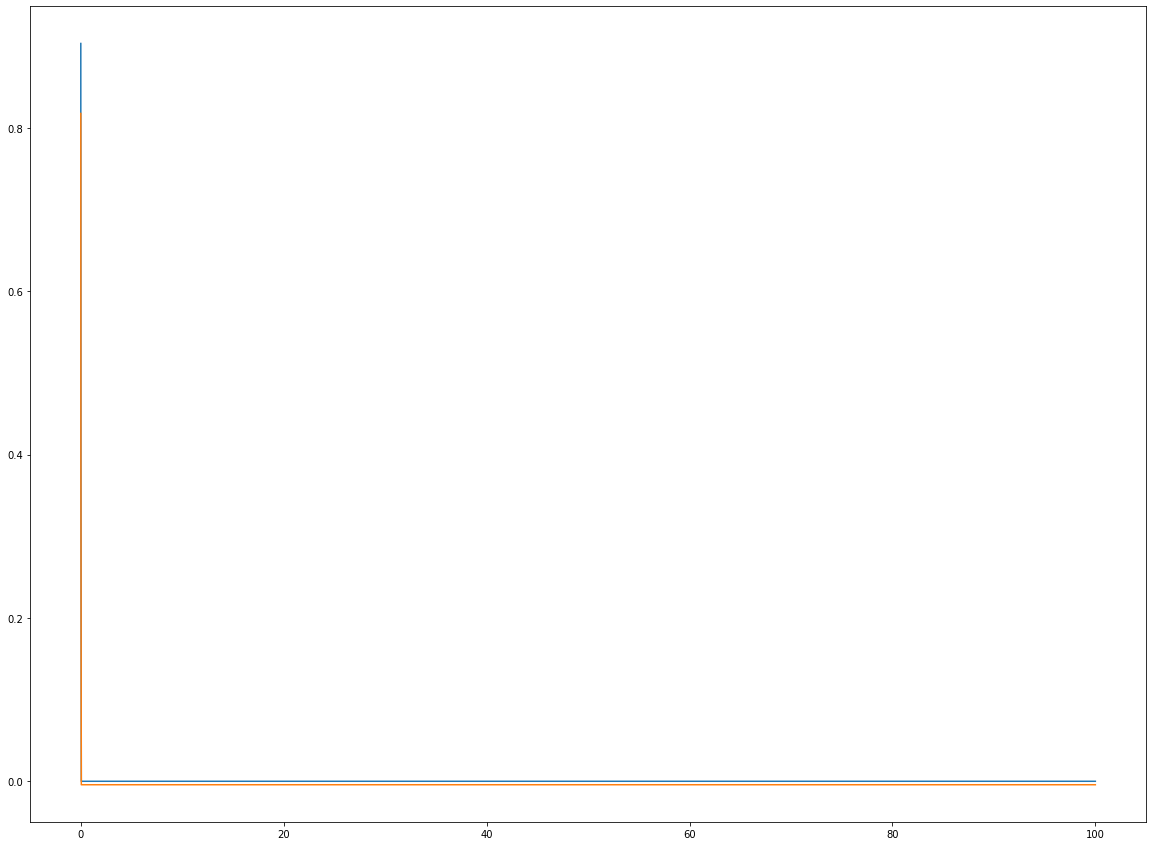

r2_score_train: 0.8936382601293675
r2_score_test: 0.8558227790351611
[('Functional_Typ', [0.01153066302108932]), ('HouseStyle_1Story', [0.011618549247424918]), ('SaleType_New', [0.012825221273010447]), ('Condition1_Norm', [0.013380113339519965]), ('LotConfig_CulDSac', [0.016106195518577313]), ('Neighborhood_Veenker', [0.01676454654804853]), ('LandContour_Low', [0.017289474532539602]), ('OverallQual', [0.017712682936891315]), ('LandContour_Lvl', [0.018548942899136514]), ('LandContour_HLS', [0.02091950298421364]), ('Neighborhood_Somerst', [0.024202349279306788]), ('Exterior1st_BrkFace', [0.025081013448528557]), ('Exterior2nd_ImStucc', [0.025792100274222064]), ('Neighborhood_Crawfor', [0.02652673588232672]), ('RoofMatl_CompShg', [0.028636962259490324]), ('Neighborhood_StoneBr', [0.029503506922592574]), ('OverallCond', [0.03995916719960457]), ('Neighborhood_NridgHt', [0.04684377719971051]), ('Neighborhood_NoRidge', [0.06053293865134476]), ('RoofMatl_WdShngl', [0.13797841004656736])]


In [104]:
hyp_par = {'alpha' :[0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1, 10, 20, 50, 100]}
folds = 4
lasso = Lasso()
alpha = 0
def model_evaluation(model):
    print(model)
    model_cv = GridSearchCV(estimator = model, param_grid = hyp_par, scoring = 'r2', 
                            cv = folds, return_train_score = True, verbose = 1)
    model_cv.fit(X_train, y_train)
    cv_result = pd.DataFrame(model_cv.cv_results_)
    alpha = str(cv_result['param_alpha'].loc[cv_result['mean_test_score'].idxmax()])
    print("best alpha values : " + alpha)
    plt.figure(figsize = (20,15))
    plt.plot(cv_result['param_alpha'], cv_result['mean_train_score'])
    plt.plot(cv_result['param_alpha'], cv_result['mean_test_score'])
    plt.show()
model_evaluation(Ridge())   

model_fin = Ridge(alpha = 10)
model_fin.fit(X_train, y_train)
y_train_pred = model_fin.predict(X_train)
y_test_pred = model_fin.predict(X_test)
print("r2_score_train: "+ str(r2_score(y_train,y_train_pred)))
print("r2_score_test: "+ str(r2_score(y_test,y_test_pred)))

model_param = model_fin.coef_
coef_dict = dict(zip(list(X_train.columns), model_param[:1].T.tolist()))
coef = sorted(coef_dict.items(), key= lambda x:x[1][0], reverse = False)
print(coef[-20:])                    

model_evaluation(Lasso())
model_fin = Lasso(alpha = 0.0001)
model_fin.fit(X_train, y_train)
y_train_pred = model_fin.predict(X_train)
y_test_pred = model_fin.predict(X_test)
print("r2_score_train: "+ str(r2_score(y_train,y_train_pred)))
print("r2_score_test: "+ str(r2_score(y_test,y_test_pred)))

model_param = model_fin.coef_
coef_dict = dict(zip(list(X_train.columns), model_param[:1].T.tolist()))
coef = sorted(coef_dict.items(), key= lambda x:x[1][0], reverse = False)

print(coef[-20:])


In [120]:
#checking the model performance after making the aplha double

print('#####RIDGE####')
model_fin = Ridge(alpha = 20)
model_fin.fit(X_train, y_train)
y_train_pred = model_fin.predict(X_train)
y_test_pred = model_fin.predict(X_test)
print("r2_score_train: "+ str(r2_score(y_train,y_train_pred)))
print("r2_score_test: "+ str(r2_score(y_test,y_test_pred)))
model_param = model_fin.coef_
coef_dict = dict(zip(list(X_train.columns), model_param[:1].T.tolist()))
coef = sorted(coef_dict.items(), key= lambda x:x[1][0], reverse = False)
print(coef[-20:])                    

print('#####LASSO####')
model_fin = Lasso(alpha = 0.0002)
model_fin.fit(X_train, y_train)
y_train_pred = model_fin.predict(X_train)
y_test_pred = model_fin.predict(X_test)
print("r2_score_train: "+ str(r2_score(y_train,y_train_pred)))
print("r2_score_test: "+ str(r2_score(y_test,y_test_pred)))

model_param = model_fin.coef_
coef_dict = dict(zip(list(X_train.columns), model_param[:1].T.tolist()))
coef = sorted(coef_dict.items(), key= lambda x:x[1][0], reverse = False)

print(coef[-20:])

#####RIDGE####
r2_score_train: 0.864273447401637
r2_score_test: 0.8546269357479201
[('LotConfig_CulDSac', [0.013229231386746287]), ('OverallCond', [0.013255671525333228]), ('Exterior2nd_ImStucc', [0.01352893540229329]), ('BsmtFullBath', [0.013558862026996143]), ('Neighborhood_StoneBr', [0.014682256596348173]), ('GarageArea', [0.015380566386825313]), ('Exterior1st_BrkFace', [0.01716287278653196]), ('MasVnrArea', [0.01833154483935693]), ('FullBath', [0.01884472133513629]), ('Neighborhood_Crawfor', [0.01895643842035504]), ('Fireplaces', [0.019329169362141713]), ('GarageCars', [0.02014027135766975]), ('TotRmsAbvGrd', [0.02094083782177697]), ('1stFlrSF', [0.023941261815713995]), ('RoofMatl_WdShngl', [0.024915407625051844]), ('Neighborhood_NridgHt', [0.02513456447251233]), ('2ndFlrSF', [0.02990146585216615]), ('GrLivArea', [0.031522437848554116]), ('OverallQual', [0.03887692879877265]), ('Neighborhood_NoRidge', [0.04487667167732372])]
#####LASSO####
r2_score_train: 0.8813955289913805
r2_scor